# Econometrics

# 7th Session

# Maximum Likelihood Estimation

### $U(x,y) = x^{0.5} y^{0.5} + \epsilon$

In [588]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [589]:
alpha = 0.5
beta = 0.5

x = np.random.randint(20, 300, 100)
y = np.random.randint(1, 200, 100)

epsilon = np.random.normal(0, 1, 100)

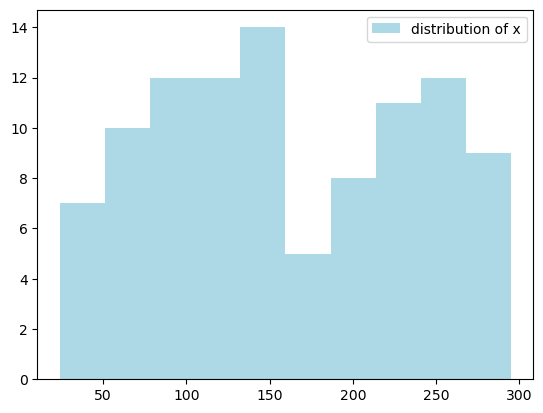

In [590]:
plt.hist(x, label = "distribution of x", color = "lightblue")
plt.legend()
plt.show()

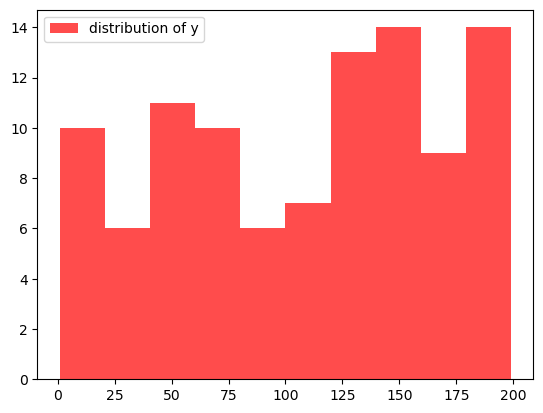

In [591]:
plt.hist(y, label = "distribution of y", color = "red", alpha = 0.7)
plt.legend()
plt.show()

In [595]:
U = x ** alpha * y ** beta + epsilon

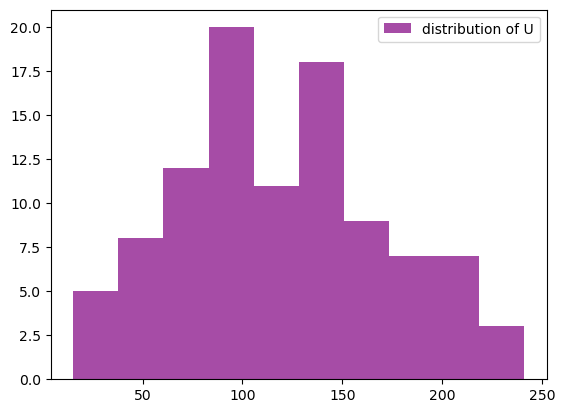

In [598]:
plt.hist(U, label = "distribution of U", color = "purple", alpha = 0.7)
plt.legend()
plt.show()

## Implementing MLE

### random sampling

In [602]:
sample_s = 40
random_chooser = np.random.choice(range(len(U)), sample_s, replace = False)
x_sample = x[random_chooser]
y_sample = y[random_chooser]
U_sample = U[random_chooser]

In [604]:
log_U = np.log(U_sample)
log_x = np.log(x_sample)
log_y = np.log(y_sample)

In [606]:
X = np.column_stack((log_x, log_y))
X = sm.add_constant(X)

In [608]:
model = sm.GLM(log_U, X, family = sm.families.Gaussian())
results = model.fit() 

print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                   40
Model:                            GLM   Df Residuals:                       37
Model Family:                Gaussian   Df Model:                            2
Link Function:               Identity   Scale:                      0.00011587
Method:                          IRLS   Log-Likelihood:                 126.06
Date:                Fri, 30 May 2025   Deviance:                    0.0042871
Time:                        03:34:51   Pearson chi2:                  0.00429
No. Iterations:                     3   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0130      0.019     -0.665      0.5

In [610]:
residuals = results.resid_deviance

dw_stats = np.sum(np.diff(residuals) ** 2) / np.sum(residuals ** 2)

print(f"Durbin-Watson Statistics: {dw_stats}")

Durbin-Watson Statistics: 1.8574388527792467


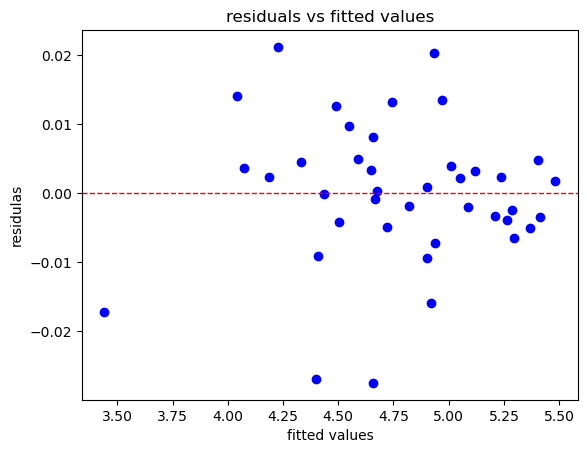

In [612]:
fitted_values = results.fittedvalues

plt.scatter(fitted_values, residuals, color = "blue")
plt.axhline(0, color = 'red', linestyle = '--', linewidth = 1)
plt.title("residuals vs fitted values")
plt.xlabel("fitted values")
plt.ylabel("residulas")
plt.show()

## QQ plot MLE

<Figure size 1200x600 with 0 Axes>

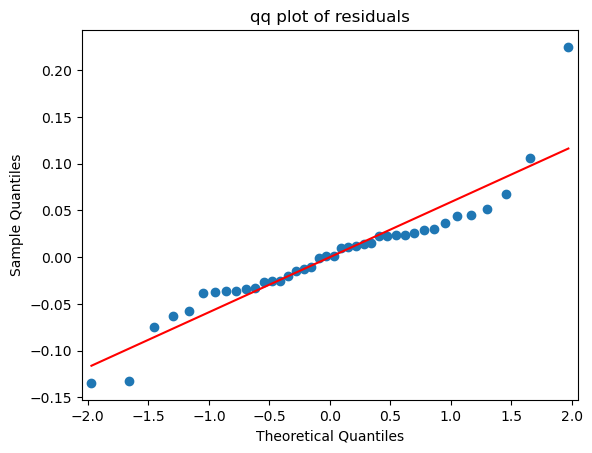

In [614]:
plt.figure(figsize = (12, 6))
sm.qqplot(residuals2, line = 's') #use ax = plt.gca() inside of the function to see a larger figure
plt.title("qq plot of residuals")
plt.show()

# How to define functions in python?

### def

### $f(x) = x^2$

In [226]:
def f(x) = x ** 2

SyntaxError: expected ':' (2696959899.py, line 1)

In [228]:
def f(x): x ** 2

In [230]:
f(1)

In [232]:
print(f(1))

None


In [254]:
def f(x): print(x**2)

In [256]:
f(1)

1


In [258]:
f(2)

4


In [259]:
f(3)

9


### The area of a triangle is 2 times the f(4)

In [263]:
area_triangle = 2 * f(4)
print(area_triangle)

16


TypeError: unsupported operand type(s) for *: 'int' and 'NoneType'

In [245]:
print(2) * 2

2


TypeError: unsupported operand type(s) for *: 'NoneType' and 'int'

In [247]:
type(print("hi"))

hi


NoneType

### for mathemtical operations between a function and other numbers we must use return instead of print()

In [267]:
def f(x): return x ** 2

In [269]:
area_triangle = 2 * f(4)
print(area_triangle)

32


### More on functions
#### define a function that computes area and perimeter of a rectangle

In [273]:
def rectangle(length, width): 
    return length * width
    return (length + width) * 2

In [275]:
rectangle(4, 2)

8

### We must use local variable

In [282]:
for i in range(1, 8):
    print (i ** 2)

1
4
9
16
25
36
49


In [284]:
print(i)

7


### in the above example i is a local variable

In [287]:
def rectangle(length, width): 
    area =  length * width
    perimeter =  (length + width) * 2
    return area, perimeter

In [289]:
rectangle(4, 2)

(8, 12)

In [295]:
area 

NameError: name 'area' is not defined

### Therefore, area and perimeter are local variables defined inside the function

In [301]:
def salam(x):
    print("hello")

In [303]:
salam(1)

hello


In [307]:
salam("hi")

hello


# Estimating the shape parameter of a Gamma Distibution using MLE

The gamma distribution is a continuous probability distribution defined by two parameters: the shape parameter $k$  (sometimes denoted as $\alpha$ and the scale parameter $\theta$ sometimes denoted as $\beta$). The probability density function (PDF) of the gamma distribution is given by:

$f(x; k, \theta) = \frac{x^{k-1} e^{-x/\theta}}{\theta^k \Gamma(k)} \quad \text{for } x > 0$

### Where:
- $x$is the random variable.
- $k > 0$ is the shape parameter.
- $\theta > 0$ is the scale parameter.
- $\Gamma(k)$ is the gamma function, which generalizes the factorial function for non-integer values, defined as:
  $\Gamma(k) = \int_0^\infty t^{k-1} e^{-t} dt$

### Properties:
- The mean of the gamma distribution is $\mu = k\theta$
- The variance is $\sigma^2 = k\theta^2$


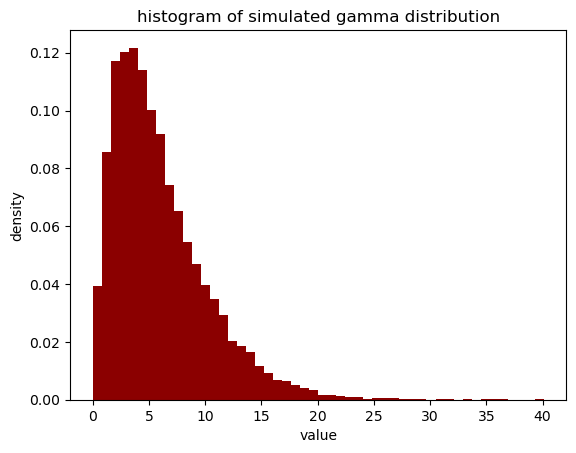

In [346]:
shape = 2
scale = 3
size = 10000

dist_generate = np.random.gamma(shape, scale, size)

plt.hist(dist_generate, bins = 50, density = True, color = 'darkred')
plt.title("histogram of simulated gamma distribution")
plt.xlabel("value")
plt.ylabel("density")
plt.show()

In [348]:
from scipy import stats

def negative_log_likelihood(parameters):
    k, theta = parameters
    if k <=0 or theta <= 0:
        return np.inf
    log_likelihood = np.sum(stats.gamma.logpdf(dist_generate, a = k, scale = theta))
    return -log_likelihood

In [350]:
tt = (1, 2)
t, r = tt
print(t)
print(r)

1
2


In [352]:
from scipy import optimize

initial_parameters = [1, 1]

result = optimize.minimize(negative_log_likelihood, initial_parameters, bounds = [(0, None), (0, None)])
estimated_shape, estimated_scale = result.x

print("estimated_shape: ", estimated_shape)
print("estimated_scale: ", estimated_scale)

estimated_shape:  1.9883797318024425
estimated_scale:  3.020653791055946


#### if the error terms in a regression model are normally distributed, then the Ordinary Least Squares (OLS) estimator is equivalent to the Maximum Likelihood Estimator (MLE)

In [ ]:
import numpy as np
import statsmodels.api as sm
from scipy import optimize
import scipy.stats as stats

np.random.seed(42)

n = 100  
X = np.random.normal(0, 1, n)  

true_intercept = 2.0
true_slope = 3.0
epsilon = np.random.normal(0, 1, n)  #Normally distributed error term
Y = true_intercept + true_slope * X + epsilon  

X_ols = sm.add_constant(X)  
ols_model = sm.OLS(Y, X_ols).fit()
print("OLS Results:")
print(ols_model.summary())


def neg_log_likelihood(params):
    beta_0, beta_1, sigma = params
    if sigma <= 0:  
        return np.inf
    log_likelihood = -np.sum(stats.norm.logpdf(Y, loc=beta_0 + beta_1 * X, scale=sigma))
    return log_likelihood

initial_params = [0, 0, 1]

result = optimize.minimize(neg_log_likelihood, initial_params, bounds=[(None, None), (None, None), (1e-5, None)])
mle_params = result.x

print("\nMLE Results:")
print(f"Estimated Intercept: {mle_params[0]}")
print(f"Estimated Slope: {mle_params[1]}")
print(f"Estimated Standard Deviation: {mle_params[2]}")


OLS Results:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     739.0
Date:                Fri, 30 May 2025   Prob (F-statistic):           1.94e-47
Time:                        15:16:51   Log-Likelihood:                -135.71
No. Observations:                 100   AIC:                             275.4
Df Residuals:                      98   BIC:                             280.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0074      0.096     21

In [2]:
X_glm = sm.add_constant(X)  # Add intercept
glm_model = sm.GLM(Y, X_glm, family=sm.families.Gaussian()).fit()

# Display GLM results
print("GLM Results:")
print(glm_model.summary())


GLM Results:
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Gaussian   Df Model:                            1
Link Function:               Identity   Scale:                         0.90167
Method:                          IRLS   Log-Likelihood:                -135.71
Date:                Fri, 30 May 2025   Deviance:                       88.363
Time:                        15:19:01   Pearson chi2:                     88.4
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9994
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0074      0.096     21

# Exercises

### 1. Write a function that calculates the area and the primeter of a cirlce

### 2. Write a function that plots a histogram for a given mean, variance, and number of observations.

### 3. Define a Cobb-Douglas production function.

### 4. Define a Cobb-Douglas production function. Then, use the function to calculate the production level for 10 different pairs of labor and capital in a loop, and plot a line graph of these production levels.

### 5. Create a function that takes two random sets and performs union, intersection, and difference.

### 6. Create a function that takes two random array of numbers and calculates covariance and correlation between them.

hint: np.cov()

### 7. Write a function that checks whether a number is prime. 

### 8. Use a for loop to find all prime numbers in a given range.